In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.ndimage import gaussian_filter1d
import matplotlib.dates as mdates
import datetime
import os
import sys

In [2]:
path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,path)

In [3]:
from covid.utils import get_region_data

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
def gaussian_smooth(data, days=0):
    if days > 0:
        return gaussian_filter1d(data, days)
    else:
        return data

In [6]:
colors = ['#006FED', '#E03424', 'gray', '#009966', '#000866', '#336600', '#006633', 'm', 'r']

In [7]:
metrics = [
    "newCasesByPublishDate",
    "newCasesBySpecimenDate",
    "uniquePeopleTestedBySpecimenDateRollingSum",
    "uniqueCasePositivityBySpecimenDateRollingSum",
    "newDeathsByDeathDate",
    "newDeaths28DaysByPublishDate",
    "newDeaths28DaysByDeathDate",
    "newOnsDeathsByRegistrationDate",
    "newDeaths60DaysByPublishDate",
    "newDeaths60DaysByDeathDate",
]

In [8]:
nhs_metrics = [
    "newAdmissions",
    "covidOccupiedMVBeds",
    "hospitalCases"
]

In [9]:
df = get_region_data(metrics=metrics, nhs_metrics=nhs_metrics)

In [10]:
df['CFR'] = df['newDeaths28DaysByDeathDate'] / df['newCasesBySpecimenDate']
df['MVDeathRate'] = df['newDeaths28DaysByDeathDate'] / df['covidOccupiedMVBeds'] 

In [11]:
df

,date,areaName,newCasesByPublishDate,newCasesBySpecimenDate,uniquePeopleTestedBySpecimenDateRollingSum,uniqueCasePositivityBySpecimenDateRollingSum,newDeathsByDeathDate,newDeaths28DaysByPublishDate,newDeaths28DaysByDeathDate,newOnsDeathsByRegistrationDate,newDeaths60DaysByPublishDate,newDeaths60DaysByDeathDate,newAdmissions,covidOccupiedMVBeds,hospitalCases,CFR,MVDeathRate
0,2020-01-03,East of England,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,2020-01-03,London,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,Midlands,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
3,2020-01-03,North East and Yorkshire,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
4,2020-01-03,North West,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2585,2021-01-06,Midlands,9801,0.0,0.0,0.0,0.0,158,0.0,0.0,186,0.0,NaN,NaN,NaN,NaN,NaN
2586,2021-01-06,North East and Yorkshire,5035,0.0,0.0,0.0,0.0,127,0.0,0.0,162,0.0,NaN,NaN,NaN,NaN,NaN
2587,2021-01-06,North West,5793,0.0,0.0,0.0,0.0,81,0.0,0.0,94,0.0,NaN,NaN,NaN,NaN,NaN
2588,2021-01-06,South East,9567,0.0,0.0,0.0,0.0,143,0.0,0.0,153,0.0,NaN,NaN,NaN,NaN,NaN


In [12]:
additional_metrics = ['CFR', 'MVDeathRate']

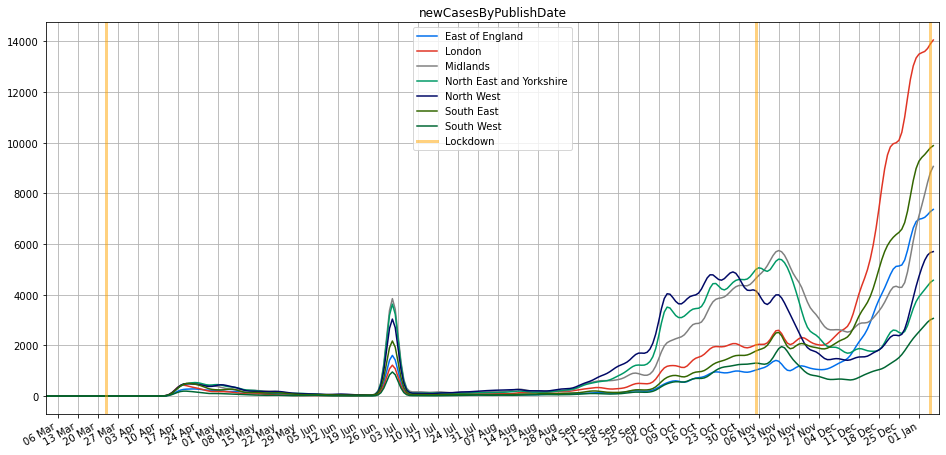

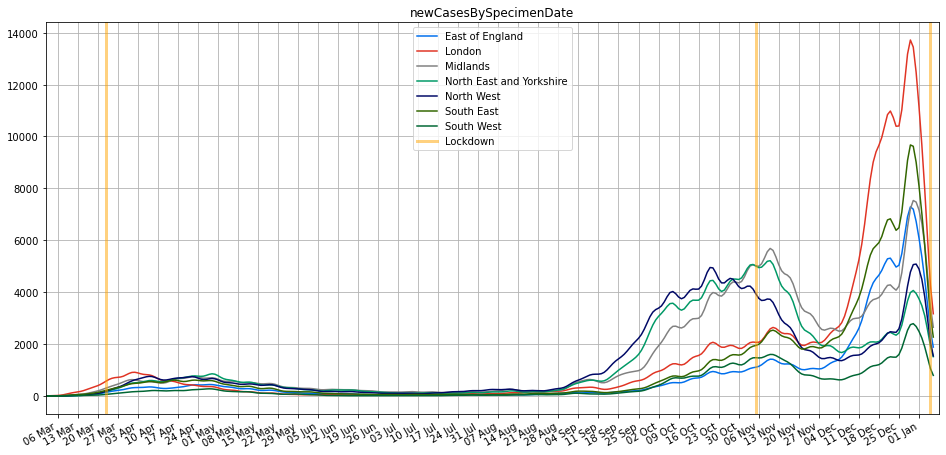

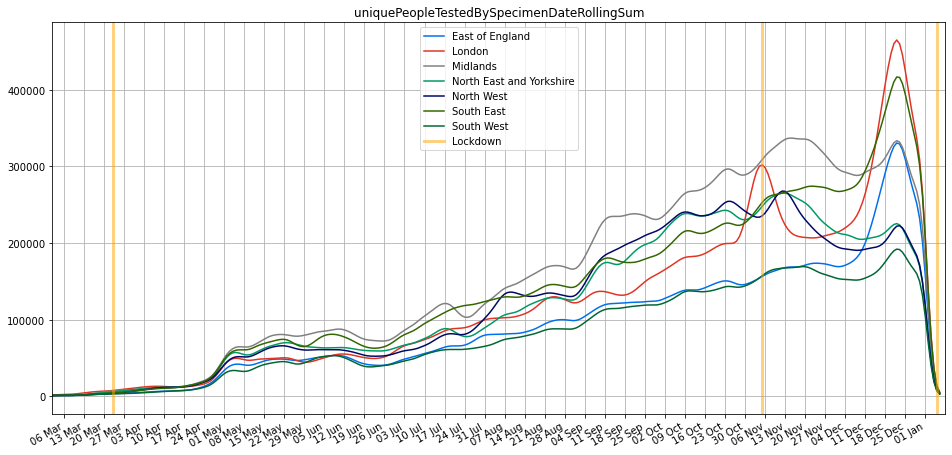

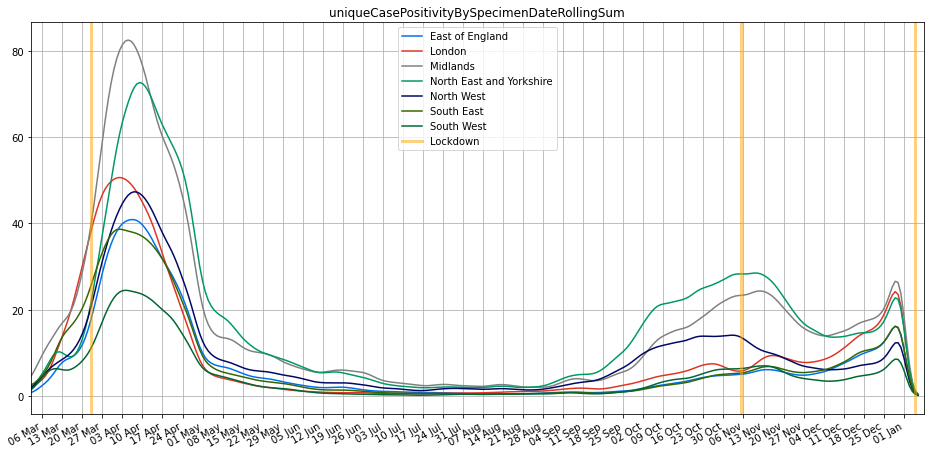

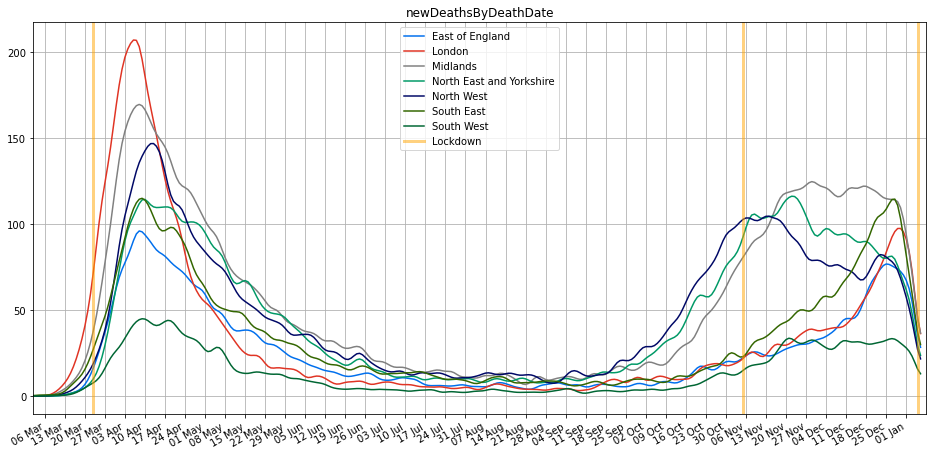

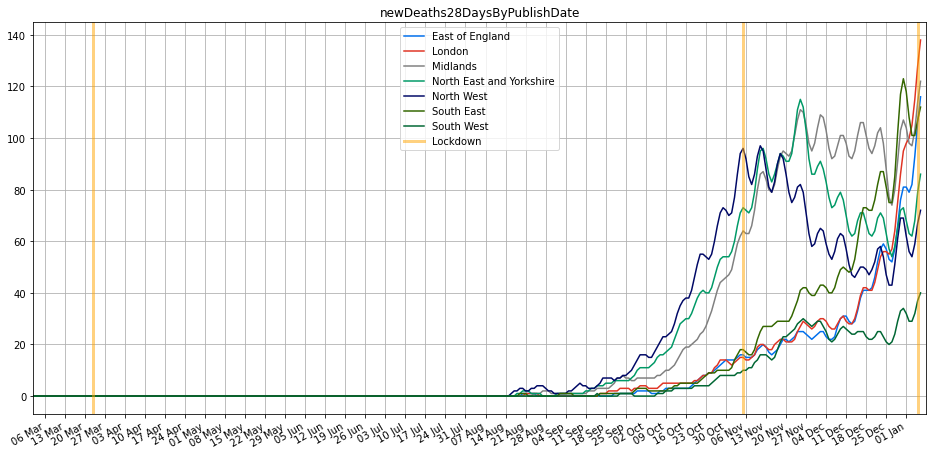

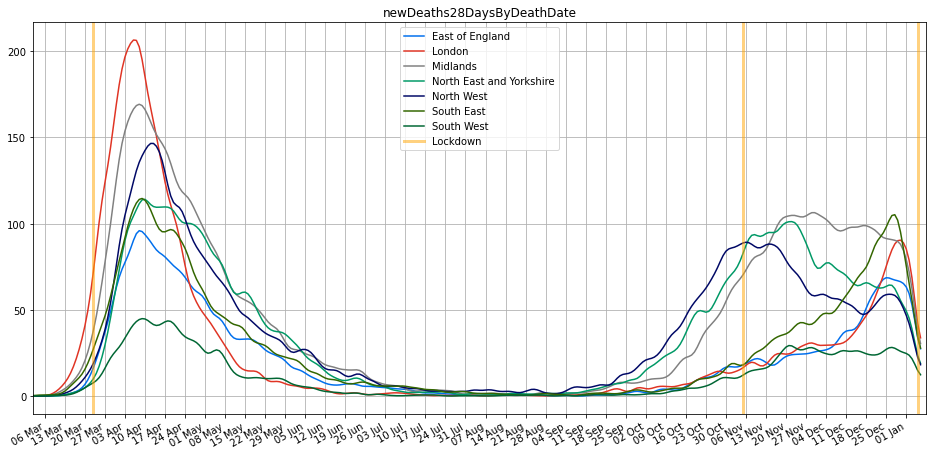

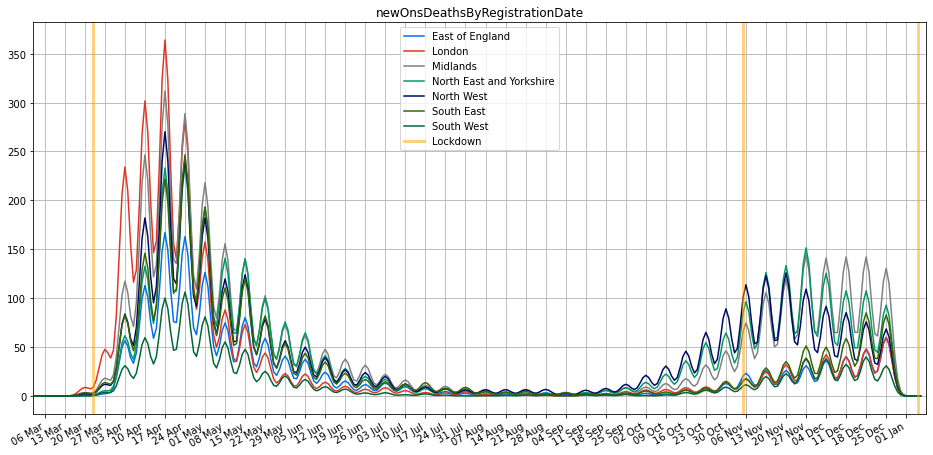

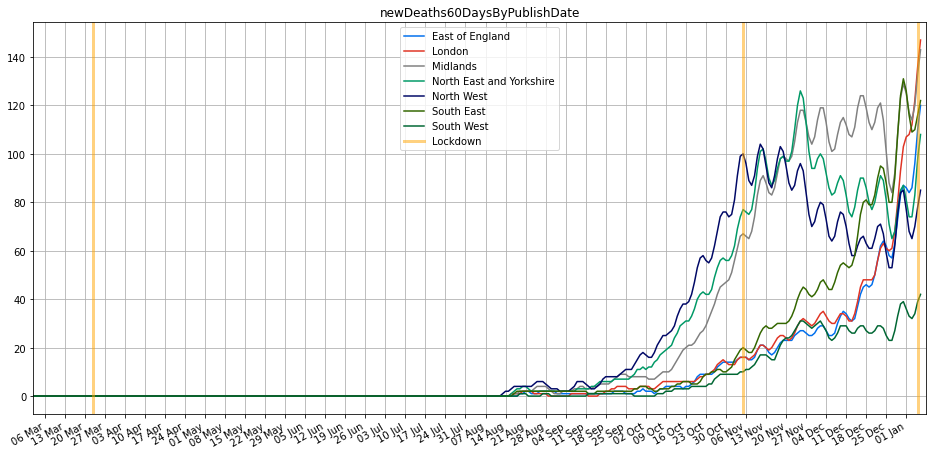

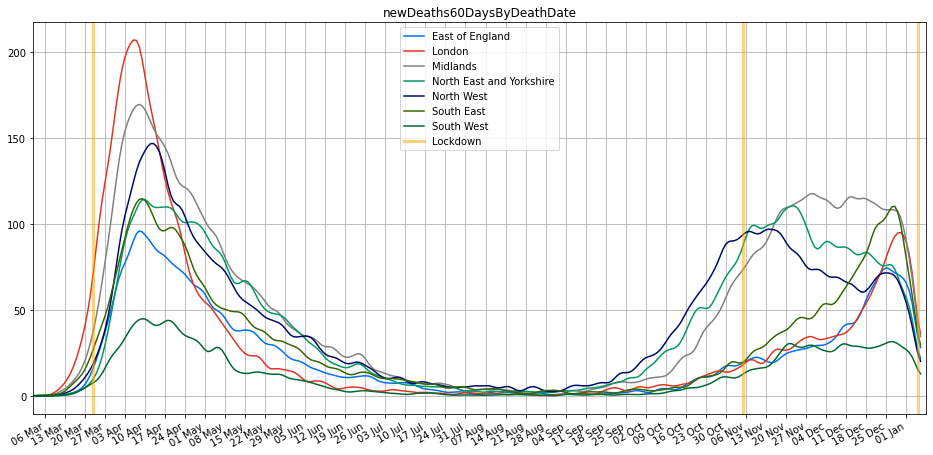

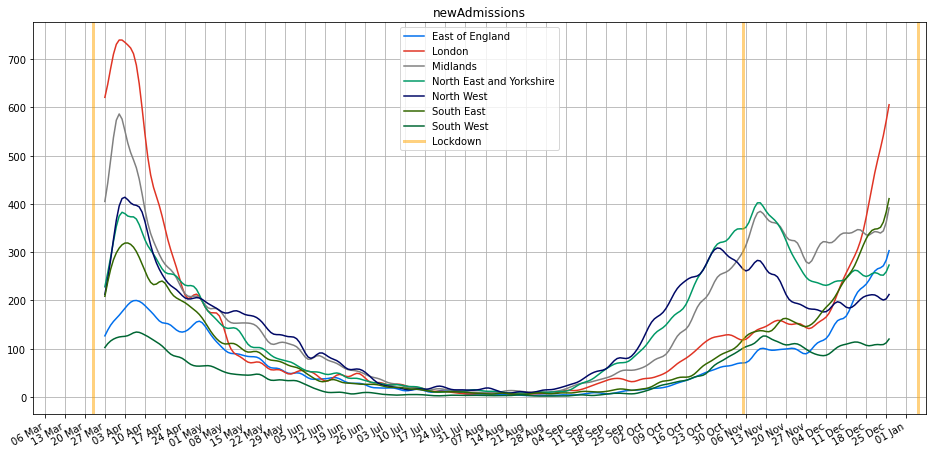

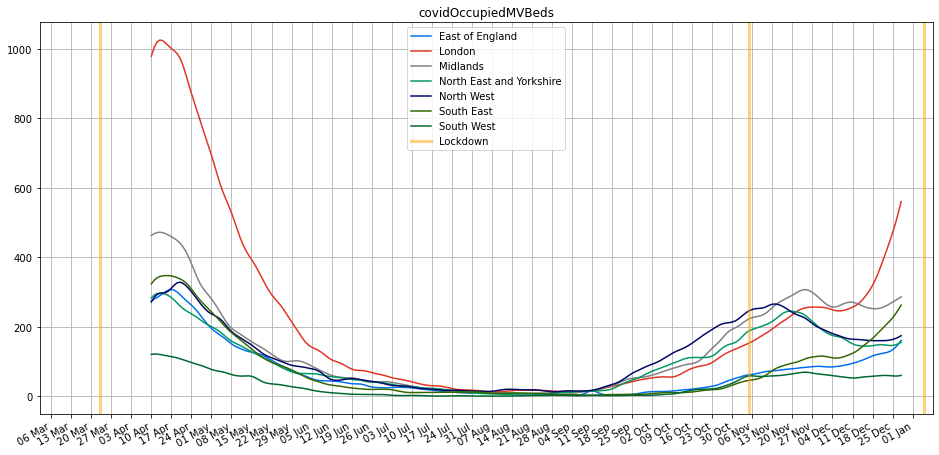

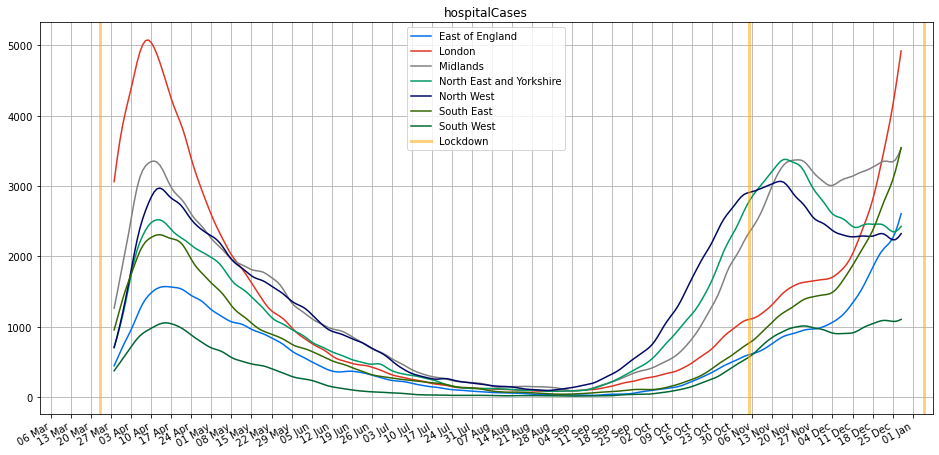

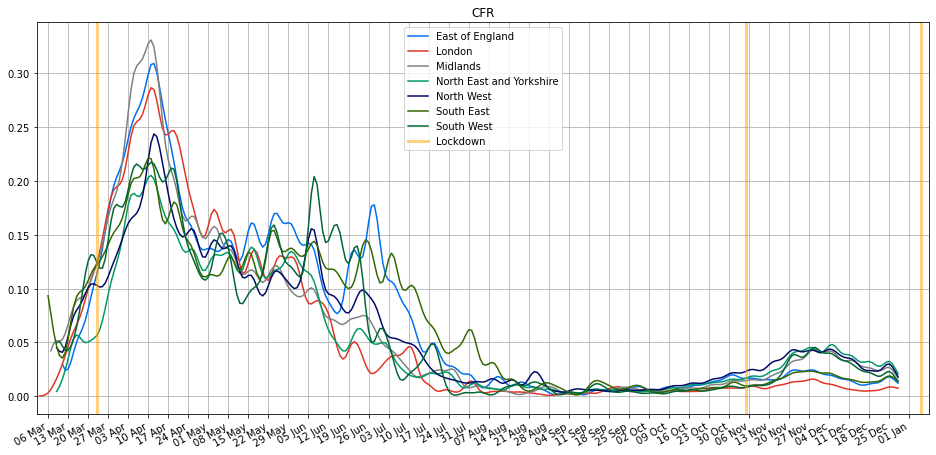

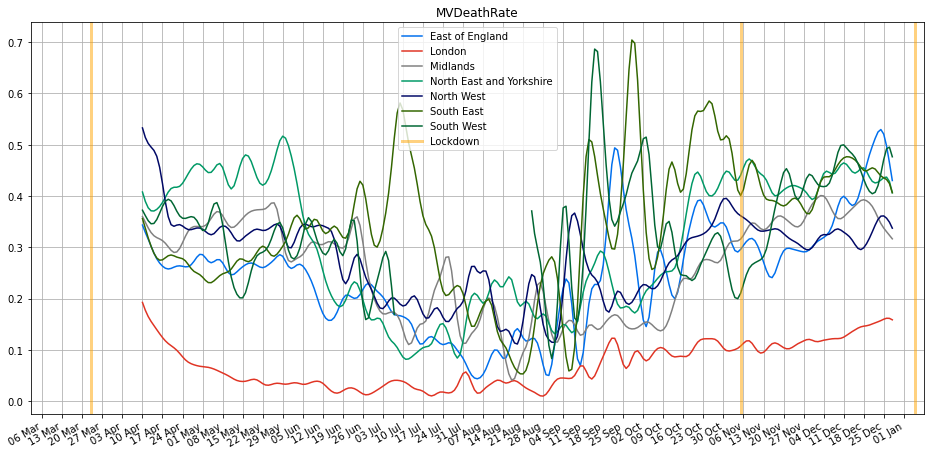

In [16]:
for metric in metrics + nhs_metrics + additional_metrics:
    if metric in df:
        plt.figure(figsize=(16,8))
        for i, region in enumerate(df['areaName'].unique()):
            df_region = df[df['areaName'] == region]
            plt.plot(df_region['date'], gaussian_smooth(df_region[metric], 2), label=region, color=colors[i])
        plt.axvline(datetime.datetime(2020, 3, 23), label='Lockdown', color='orange', linewidth=3, alpha=0.5)
        plt.axvline(datetime.datetime(2020, 11, 5), color='orange', linewidth=3, alpha=0.5)
        plt.axvline(datetime.datetime(2021, 1, 5), color='orange', linewidth=3, alpha=0.5)
        plt.legend()
        ax = plt.gca()
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
        ax.set_xlim([datetime.datetime(2020, 3, 2), datetime.datetime.now() + datetime.timedelta(days=1)])
        ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
        plt.gcf().autofmt_xdate() # Rotation
        plt.title(metric)
        plt.grid()
        plt.show()